In [1]:
# TODO: handle rgb or bw images
# TODO: slice edges and get median of the rows to find ridges
# TODO see how uri calculated the ridges


In [2]:
%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

def crop(image, ymin, ymax, xmin, xmax):
    return image[ymin:ymax, xmin:xmax]

def thresholded(image, val): 
    return np.logical_and(*[image[...] > val  for t in enumerate([0, 0])])

def find_min_max_without_orphand_pixels(nonzero_dimension, crop_filter=20):
    sorted = np.sort(nonzero_dimension)
    prev=-1
    min_val = sorted[0]
    for i, x in enumerate(sorted[:100]):
        if prev >= 0 and x - prev > crop_filter:
            min_val = x
        prev = x
    prev=-1
    max_val = sorted[-1]
    for i, x in enumerate(sorted[-100:]):
        if prev >= 0 and x - prev > crop_filter:
            max_val = prev
            break
        prev = x
    
    return min_val, max_val


def crop_thresholded(image, crop_val=50):
    temp = crop(image, 600, 4300, 1000, 6000)
    temp = thresholded(temp, crop_val)
    temp = temp * 1
    temp = np.nonzero(temp)
    ymin, ymax = find_min_max_without_orphand_pixels(temp[0])
    xmin,xmax = find_min_max_without_orphand_pixels(temp[1])
    temp = crop(image, 600+ymin, 600+ymax, 1000+xmin, 1000+xmax)
    return temp

# TODO: fix performance!!! http://scikit-image.org/docs/dev/user_guide/tutorial_parallelization.html
def combine_3_images_to_RGB(red, green, blue):
    new_image = np.empty((blue.shape[0],blue.shape[1],3))
    for x in range(0, blue.shape[0]):
        for y in range(0, blue.shape[1]):
            new_image[x,y,0] = red[x,y]
            new_image[x,y,1] = green[x,y]
            new_image[x,y,2] = blue[x,y]
    return new_image

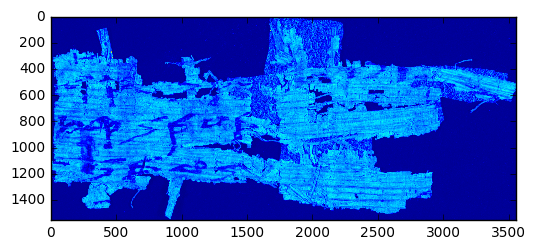

In [3]:
blue = img.imread("/Users/il239838/Downloads/private/Thesis/Papyrus/jm_4a36716c764b6d6b4c442f464b3342347436653838673d3d/P598-Fg009-R/P598-Fg009-R-C01-R01-D07012014-T124136-LR445__001.jpg")
green = img.imread("/Users/il239838/Downloads/private/Thesis/Papyrus/jm_4a36716c764b6d6b4c442f464b3342347436653838673d3d/P598-Fg009-R/P598-Fg009-R-C01-R01-D07012014-T124150-LR540__004.jpg")
red = img.imread("/Users/il239838/Downloads/private/Thesis/Papyrus/jm_4a36716c764b6d6b4c442f464b3342347436653838673d3d/P598-Fg009-R/P598-Fg009-R-C01-R01-D07012014-T124206-LR656__007.jpg")

blue = crop_thresholded(blue)
green = crop_thresholded(green)
red = crop_thresholded(red)

plt.imshow(green)

img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/outputs/pseudo_red_crop", red)
img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/outputs/pseudo_green_crop", green)
img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/outputs/pseudo_blue_crop", blue)

In [4]:
new_image = combine_3_images_to_RGB(red,green,blue)
        

In [5]:
new_image.shape

(1546, 3549, 3)

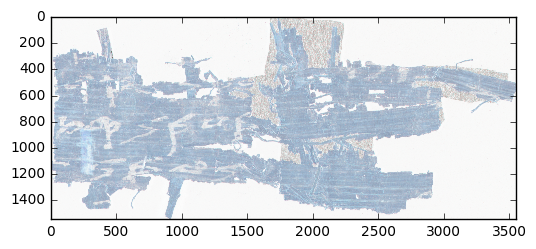

In [6]:
plt.imshow(new_image)
img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/outputs/pseudo_RGB_crop", new_image)

In [10]:
histo = np.histogram(blue, bins=np.arange(100, 256))
histo
# plt.imshow(histo)

(array([13, 16,  4, 12,  5,  9,  7,  4, 14,  2,  5,  4, 10,  2,  5,  1,  2,
         2,  5,  7,  2,  4,  5,  4,  1,  2,  2,  3,  2,  2,  2,  3,  1,  2,
         4,  1,  0,  2,  2,  2,  3,  0,  3,  1,  1,  0,  1,  2,  1,  2,  2,
         3,  3,  1,  1,  1,  1,  2,  2,  0,  0,  0,  2,  2,  1,  1,  0,  4,
         2,  1,  0,  1,  0,  4,  2,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,
         0,  0,  3,  0,  0,  1,  0,  0,  0,  4,  0,  2,  0,  0,  2,  0,  0,
         2,  0,  0,  0,  1,  0,  2,  0,  0,  2,  2,  2,  0,  0,  0,  0,  0,
         0,  1,  2,  0,  2,  3,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
      

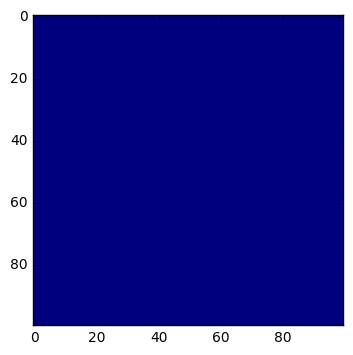

In [88]:
all_black = np.zeros((100,100))
all_black
plt.imshow(all_black)
img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/all_black", all_black)

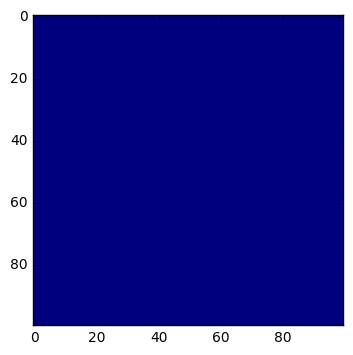

In [108]:
all_white = np.full((100,100), 145, dtype=np.int)
all_white
plt.imshow(all_white)
# img.imsave("/Users/il239838/Downloads/private/Thesis/Papyrus/all_white", all_white)

array([[  0,   1,   2, ...,  97,  98,  99],
       [  1,   2,   3, ...,  98,  99, 100],
       [  2,   3,   4, ...,  99, 100, 101],
       ..., 
       [ 97,  98,  99, ..., 194, 195, 196],
       [ 98,  99, 100, ..., 195, 196, 197],
       [  0,   0,   0, ...,   0,   0,   0]])

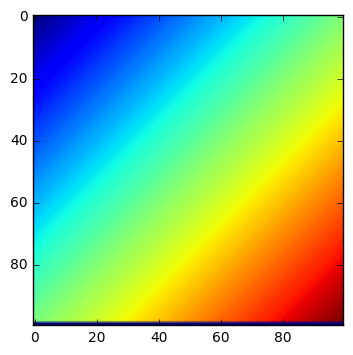

In [117]:
mixed = np.empty((100,100), dtype=np.int)
for x in range(0, 99):
    for y in range(0, 100):
        mixed[x,y] = x+y
        
plt.imshow(mixed)
mixed